<a href="https://colab.research.google.com/github/joaquimrafael/Data_management/blob/main/Pandas1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->



# Lab: Pandas I  

O principal objetivo desse lab é você entender fazer a aquisição de dados com `Pandas` e uma exploração inicial dos dados.

<br>

Referências e Materiais úteis para este Lab:

* [Notas de Aula](https://colab.research.google.com/github/Rogerio-mack/Analise_de_dados_labs/blob/main/Lab_Pandas_notes.ipynb)

* [Notas de Aula - ao vivo*](https://colab.research.google.com/github/Rogerio-mack/Analise_de_dados_labs/blob/main/Lab_Pandas_notes.ipynb)

<br>

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/PDSH-cover.png
" width=150>

* [Jake VanderPlas. **Python Data Science Handbook**](https://jakevdp.github.io/PythonDataScienceHandbook/)

* [Pandas Cheat Sheet for Data Science in Python](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

<br>
---



# Basic imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## **CASE: Insurance**

Acesse a base de dados [`insurance`](https://github.com/Rogerio-mack/Analise_de_dados_labs/raw/main/insurance.csv) para as questões a seguir.



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Analise_de_dados_labs/main/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [ ]:
print('O tamanho da tabela é:(linhas, colunas)')
df.shape


O tamanho da tabela é:(linhas, colunas)


(1338, 7)

In [ ]:
df.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

##### Q1. Acesse os dados explore a estrutura básica dos dados de `insurance`.

> * Qual o número de caso de seguro?
> * Quantos atributos são numéricos?
> * Há quantos valores diferentes para região?
> * Qual a maior quantidade de filhos?

In [ ]:
print('O número de casos de seguro é: {}'.format(len(df)))


O número de casos de seguro é: 1338


In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:

print("Existem {} atributos númericos".format(4))

Existem 4 atributos númericos


In [ ]:
print('Há para região {} valores diferentes'.format(df['region'].nunique()))


Há para região 4 valores diferentes


In [ ]:
print('A maior quantidade de filhos é {}'.format(df.children.max()))

A maior quantidade de filhos é 5


##### Q2. Qual a quantidade de casos por região?

In [ ]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
df.region.value_counts() / len(df)

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64

In [ ]:
sudeste = len(df[df.region == 'southeast'])
print('Existem {} casos na região sudeste'.format(sudeste))

Existem 364 casos na região sudeste


In [ ]:
sudoeste = len(df[df.region == 'southwest'])
print('Existem {} casos na região sudoeste'.format(sudoeste))

Existem 325 casos na região sudoeste


In [ ]:
nordeste = len(df[df.region == 'northeast'])
print('Existem {} casos na região nordeste'.format(nordeste))

Existem 324 casos na região nordeste


In [ ]:
noroeste = len(df[df.region == 'northwest'])
print('Existem {} casos na região noroeste'.format(noroeste))

Existem 325 casos na região noroeste


##### Q3. Qual a média dos pagamentos (charges) efetuados?

In [ ]:
print('O pagamento médio é U${:.2f}'.format(df.charges.mean()))

O pagamento médio é U$13270.42


##### Q4. Qual a média dos pagamentos (charges) dos 10 maiores pagamentos efetuados?

In [ ]:
selecao = df.sort_values(by='charges', ascending=False).head(10)
print("A média dos 10 maiores pagamentos efetuados é de U${:.2f}".format(selecao.charges.mean()))

A média dos 10 maiores pagamentos efetuados é de U$55130.96


In [ ]:
df.nlargest(10, 'charges').charges.mean()

55130.961078

In [ ]:
df.nsmallest(10, 'charges').charges.mean()

1140.13016

##### Q5. Qual o percentual de mulheres seguradas?

In [ ]:
molieres = len(df[df.sex == 'female'])
total = len(df)
porcentagem = (molieres / total)*100

print('O percentual de mulheres é {:.2f}%'.format(porcentagem))

O percentual de mulheres é 49.48%


##### Q6. Qual o percentual de homens seguradas?

In [ ]:
homens = len( df[df.sex == 'male'])

percentual = (homens/total)*100

print('O percentual de homens é {:.2f}%'.format(percentual))

O percentual de homens é 50.52%


##### Q7. Qual o valor médio pago pelos homens segurados?

In [ ]:
media_homens = df[df.sex == 'male'].charges.mean()

print('O valor médio pago pelos homens segurados é U${:.2f}'.format(media_homens))

O valor médio pago pelos homens segurados é U$13956.75


##### Q8. Qual a média de idade dos homens e mulheres?

In [ ]:
idade_homens = df[df.sex == 'male'].age.mean()
print('A média de idade masculina é {:.0f} anos '.format(idade_homens))

A média de idade masculina é 39 anos 


In [ ]:
idade_mulheres = df[df.sex == 'female'].age.mean()
print('A média de idade feminina é {:.0f} anos '.format(idade_mulheres))

A média de idade feminina é 40 anos 


##### Q9. Calcule a distância interquartis dos pagamentos.

**Dica** Empregue a função `quantile()` do `Pandas` e use IQR = Q3 - Q1.



In [ ]:
q1 = df.charges.quantile(0.25)
print('Primeiro quartil = {:.2f}'.format(q1))

q3 = df.charges.quantile(0.75)
print('terceiro quartil = {:.2f}'.format(q3))

iqr = q3 - q1

print('A distância Interquartil dos pargamentos é {:.1f}'.format(iqr))

Primeiro quartil = 4740.29
terceiro quartil = 16639.91
A distância Interquartil dos pargamentos é 11899.6


In [ ]:
df.charges.median()

9382.033

##### Q10. Empregue o valor IQR da questão anterior para verificar se existem *outliers* dos pagamentos.

**Dica** *outliers* são dados fora do intervalo $[Q1 - 1.5 IQR, Q3 + 1.5 IQR]$

In [ ]:
intervalo1 = q1-(1.5*iqr)
intervalo2 = q3+(1.5*iqr)
selecao = (df["charges"] <= intervalo1) | (df["charges"] >= intervalo2)
if(df[selecao].shape[0] == 0):
  print("Não existem outliers")
else:
  print(f"Existem {df[selecao].shape[0]} outliers!")

Existem 139 outliers!


##### Q11. Faça um gráfico de caixa dos valores de `charges` para homens e mulheres.

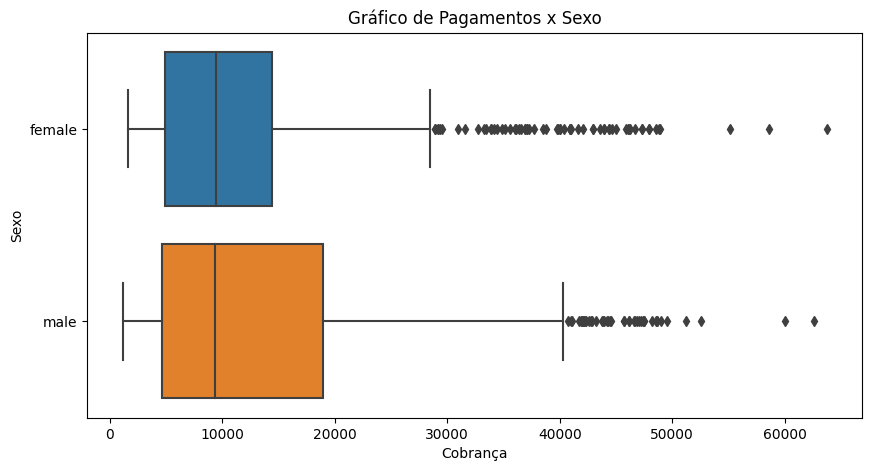

In [ ]:
plt.figure(figsize =(10, 5))



sns.boxplot(y="sex", x="charges", data=df)
plt.title("Gráfico de Pagamentos x Sexo")
plt.ylabel("Sexo")
plt.xlabel("Cobrança")

plt.show()